# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train =len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape_before = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

def rgb2gray(rgb):
    return np.expand_dims(np.dot(rgb[...,:3],[0.299,0.587,0.114]),axis=3)

X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

image_shape_after = X_train[0].shape

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape of color image=", image_shape_before)
print("Image data shape of grayscale image=", image_shape_after)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape of color image= (32, 32, 3)
Image data shape of grayscale image= (32, 32, 1)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0


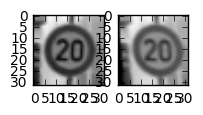

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
from skimage import transform 
%matplotlib inline

index = random.randint(0,100)
image = X_train[index].squeeze()

print(y_train[index])
# Visualizations will be shown in the notebook.

afine_tf = transform.AffineTransform(shear=0.1)
# Apply transform to image data

modified = transform.warp(image, afine_tf)

fig, axes = plt.subplots(ncols=2,figsize=(2,2))

axes[0].imshow(image, cmap = 'gray')
axes[1].imshow(modified, cmap = 'gray' )

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# min-maz scaling to [0.1.0.9]
def normalize(image_data):
    return 0.1 + image_data*(0.8/255)
  
X_train, y_train = shuffle(X_train, y_train)
X_train = normalize(X_train)
X_test = normalize(X_test)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I unzipped the "traffic-signs-data.zip" file and got two pickled files: "train.p" and "test.p". I loaded the pickle files and obtained the taining data and testing data, which are dictionaries. Then training set and testing set can be extracted by keys. I transfered the color images to grayscale images, then the training set and testing set were shuffled and normalized to [0.1, 0.9]. I originally used color images to trian my model, but it performed poorly (accuracy < 40%) on samples outside of the German Trffic Sign Dataset, even though I applied dropout after each layer. So I tried grayscale images, the trained model seems to work better (accuracy >= 70%). In terms of normalization, I tried two methods: one is to scale to [0.1,0.9], the other is standard normalization (minus mean and divided by std). The first one worked better in this dataset. 

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import math
#select 2*10% training set to distort
num_distort = math.ceil(len(X_train)*0.1)
X_train_afine, y_train_afine = X_train[:num_distort,...],y_train[:num_distort,...]

# Apply transform to image data
arr_X = np.zeros((len(X_train)+num_distort, 32, 32, 1))
arr_y = np.zeros(len(X_train)+num_distort)

for j in range(len(arr_X)):
    if j < len(X_train):
        arr_X[j,...], arr_y[j] = X_train[j,...], y_train[j]
    else:
        X_modified = transform.warp(X_train_afine[j-len(X_train)], afine_tf)
        arr_X[j,...], arr_y[j] = X_modified, y_train_afine[j-len(X_train)]

X_train, y_train = shuffle(arr_X, arr_y)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Size of training set = {}, size of validation set = {}".format(len(y_train), len(y_validation)))

Size of training set = 34504, size of validation set = 8626


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  I split the training set to training and validation sets with the ratio as 8:2. As Pierre Sermanet and Yann LeCun mentioned in their ConvNets paper :"Traffic sign examples in the GTSRB dataset were extracted from 1-second video sequences, i.e. each real-world instance yields 30 samples with usually increasing resolution as the camera is approaching the sign." So the dataset we are using has many internal series, in order to suppress these internal data pattern, I copied 10% of training data, and applied AffineTransform upon half of them seperately using skimage module, then I added these transformed data back to training set.(I tried blur transformation too, but it worked badly on exteranl images, so I dumped them.) The new dataset increase the test-accuracy from 0.935 to 0.963. 

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 10), mean = mu, stddev = sigma))
                          
    conv1_b = tf.Variable(tf.truncated_normal(shape=([10]), mean = mu, stddev = sigma))

    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1,keep_prob)

    # SOLUTION: Pooling. Input = 28x28x10. Output = 14x14x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 32), mean = mu, stddev = sigma))
                          
    conv2_b = tf.Variable(tf.truncated_normal(shape=([32]), mean = mu, stddev = sigma))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2,keep_prob)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.truncated_normal(shape=([240]), mean = mu, stddev = sigma))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
                        
    fc2_b = tf.Variable(tf.truncated_normal(shape=([84]), mean = mu, stddev = sigma))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
                         
    fc3_b = tf.Variable(tf.truncated_normal(shape=([43]), mean = mu, stddev = sigma))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My final architecture is basically still the same as LeNet : two convolutional layers and two fully connected layers, plus max pooling following each convolutinal layer. After couple of tuning, I expanded the deepth of the convolutional layers and fully connected layers to 10, 32, 240, and 84, respectively.

In [7]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob :1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
EPOCHS = 200
BATCH_SIZE = 220
i = 0
best_validation_accuracy = 0
patience_increase = 2     # wait this much longer when a new best is found
tolerant_threshold = 0.995  # a relative improvement of this much is considered worthy of waiting

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    while (i<EPOCHS):
        i += 1
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            saver.save(sess, 'lenet')
            continue
        else:
            if validation_accuracy > best_validation_accuracy * tolerant_threshold:
                patience = min((i + patience_increase),EPOCHS) # Update patience, keep looping.
            elif i <= int(EPOCHS/2):
                patience = int(EPOCHS/2)
            if patience <= i:  #After number of acc. dropping cycles (patience_increase), i catches up, loop breaks.
                break           
    print("Model saved")

Training...

EPOCH 2 ...
Validation Accuracy = 0.282

EPOCH 3 ...
Validation Accuracy = 0.645

EPOCH 4 ...
Validation Accuracy = 0.746

EPOCH 5 ...
Validation Accuracy = 0.832

EPOCH 6 ...
Validation Accuracy = 0.882

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.927

EPOCH 10 ...
Validation Accuracy = 0.943

EPOCH 11 ...
Validation Accuracy = 0.938

EPOCH 12 ...
Validation Accuracy = 0.951

EPOCH 13 ...
Validation Accuracy = 0.953

EPOCH 14 ...
Validation Accuracy = 0.963

EPOCH 15 ...
Validation Accuracy = 0.965

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.972

EPOCH 19 ...
Validation Accuracy = 0.973

EPOCH 20 ...
Validation Accuracy = 0.970

EPOCH 21 ...
Validation Accuracy = 0.979

EPOCH 22 ...
Validation Accuracy = 0.975

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accuracy = 0.981

EPOCH 25 ...
Validation Accur

In [11]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.963


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** To save training time and preserve the best training model, I implemented an early stopping algorithm, it only saves the model when validation accuracy increases, it also breaks the training cycles when validation accuracy starts to drop (early stop is only active after the middle point of scheduled epochs). After couple of runs, 200 epochs seems to be a good start. Then I kept other hyperparameters the same and tried different batch sizes (180, 200, 220, 250), 220 seems to render the best accuracy. Subsequently, I set the bias to normal distributed random numbers rather than zeros, which inceased the validation accuracy. To the make the model more robust, I applied drop-out after each Relu activation to suppress over-fitting. Moreover, I compared the Relu() and tanh() activation. In this case, Relu() performed better than tanh(). I also tested different sigma and learning rate, the original sigma and learning rate seem to work the best.  

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I think my approach is learning transfer. Since LeNet did quite well on reading numbers, it might be a good candidate to recognize traffic signs. I doubled the deepth of the layers, because compared to numbers, traffic signs have more features. Since my model has many layers, it tends to over-fitting (high variance), I also added drop-out between each layers, because drop-out is a well known regulation method to suppress the over-fitting. There are many hyperparameters to optimize, the best way would be a randomsearch or gridsearch, which may involve in cross-validation. Cross-validation on CNN is computationally expensive so far, so my approach is optimizing one parameter a time. First, keep the learning rate higher, set it like 0.01 to make training time shorter, change it to 0.005 or 0.001 when other hyperparameters have been selected. The sequence I used is "epochs number -> batch size -> sigma -> learning rate". Due to limit of time, I did not optimize the convalutional layer size and stride, as well as pooling methods. I got best of validation accuracy at 0.997, which is very close to the benchmark. My test accuracy is around 0.963 after new distorted data were added.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
from tqdm import tqdm
from zipfile import ZipFile
import matplotlib.image as mpimg


100%|██████████| 10/10 [00:00<00:00, 1262.81files/s]

All features and labels uncompressed.


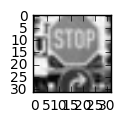

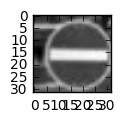

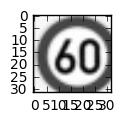

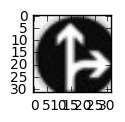

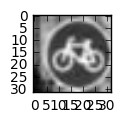

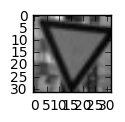

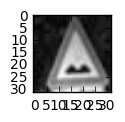

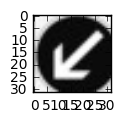

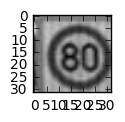

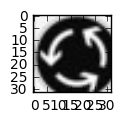

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
def uncompress_features(file):
    features = []
    
    with ZipFile(file) as zipf:
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = mpimg.imread(image_file)

                    feature = np.array(image, dtype=np.float32)

                features.append(feature[:32,...][:,:32,:])
                
    return np.array(features)

# Get the features and labels from the zip files
test_features_ts = uncompress_features('ts.zip')
test_features_ts = rgb2gray(test_features_ts)

print('All features and labels uncompressed.')



y_ts = [14,17, 3,36,29,13,25,39, 6, 40]
      
for i in range(len(test_features_ts)):
    image_ts = test_features_ts[i].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image_ts,cmap='gray')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I found 10 German traffic signs from google map and wikipedia. I cut the size of them slightly bigger than 32x32, and used numpy array slicer to cut them to exactly 32x32. The fist one would be difficult, because it basically has two signs: stop and righ turn.  

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
test_features_ts = normalize(test_features_ts)
y_ = tf.nn.softmax(logits)
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy_ts = evaluate(test_features_ts, y_ts)
    print("Test Accuracy = {:.3f}".format(test_accuracy_ts))
    classification = sess.run(tf.argmax(y_,1), feed_dict={x:test_features_ts, keep_prob:1})
    print(classification)

    
    #for i in range(len(test_features_ts)):        
     #   print("Test restult = {}".format(test_results[i]))
print ('labels are ', y_ts)

Test Accuracy = 0.600
[12 17  3 36 28 13 22 39  5 40]
labels are  [14, 17, 3, 36, 29, 13, 25, 39, 6, 40]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The accuracy on new pictures is 60%, which is worse than on the testing dataset. If I count out the error on first picuture, because it has two signs, the real accuracy is probably 70%.

TopKV2(values=array([[  9.97928977e-01,   8.75302008e-04,   6.63913670e-04,
          2.26372315e-04,   1.33739901e-04],
       [  1.00000000e+00,   5.37434001e-17,   4.50914957e-20,
          1.07955285e-20,   3.93231808e-21],
       [  9.89061713e-01,   1.98004721e-03,   1.65808992e-03,
          1.64059061e-03,   1.36819633e-03],
       [  9.99281824e-01,   5.58057975e-04,   1.13104579e-04,
          2.88818392e-05,   9.18404476e-06],
       [  3.67712140e-01,   2.34803677e-01,   1.48228630e-01,
          5.68660423e-02,   4.90593724e-02],
       [  1.00000000e+00,   7.69344115e-13,   1.96493814e-15,
          9.82856070e-17,   6.37123407e-19],
       [  9.97016549e-01,   2.84661748e-03,   4.99425405e-05,
          3.63203544e-05,   3.31650626e-05],
       [  9.99999404e-01,   4.32091923e-07,   9.97251135e-08,
          8.98689620e-08,   1.82207973e-08],
       [  9.80446041e-01,   1.38222724e-02,   2.27684365e-03,
          1.86359335e-03,   1.50114682e-03],
       [  8.02001774e-0

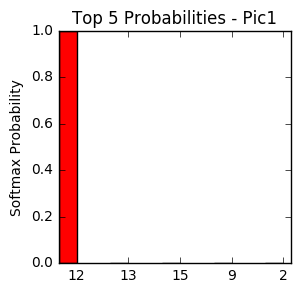

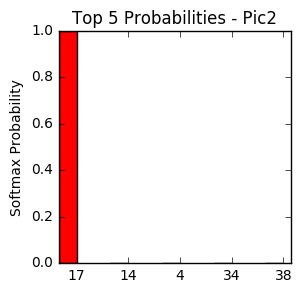

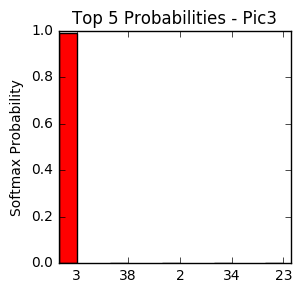

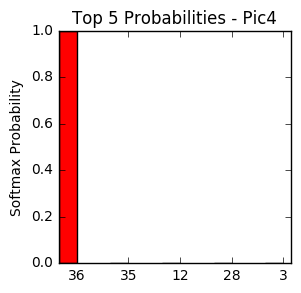

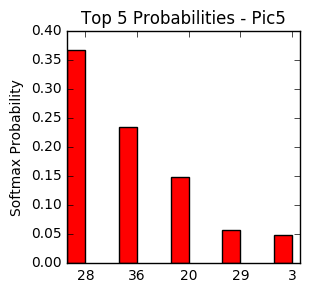

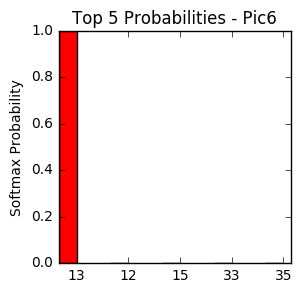

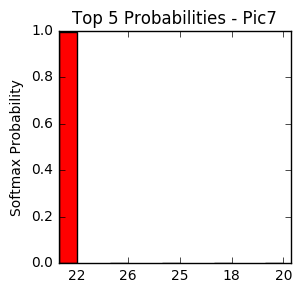

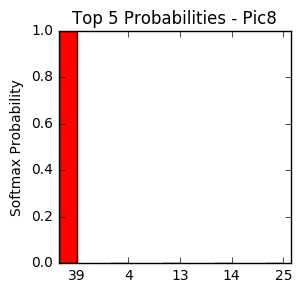

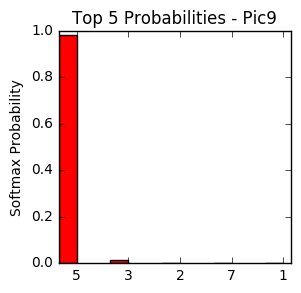

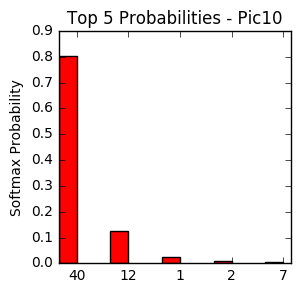

In [18]:
top5 = tf.nn.top_k(tf.nn.softmax(logits),k=5)

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    top5_rank= sess.run(top5, feed_dict={x: test_features_ts, keep_prob :1})
    print(top5_rank)
    for i in range(10):
        N = 5
        ind = np.arange(N)
        width = 0.35
        fig, ax = plt.subplots(figsize=(3,3))
        
        pic = ax.bar(ind, top5_rank[0][i],width,color='r')

        ax.set_ylabel('Softmax Probability')
        ax.set_title('Top 5 Probabilities - Pic'+str(i+1) )
        ax.set_xticks(ind + width)
        ax.set_xticklabels(top5_rank[1][i])

        plt.show()

    
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** As showed in tf.nn.top_k, 8 out of 10 predictions are very certain, prediction on pic_10 is 80% certain, prediction on pic_5 is only 37% certain. Model made incorrect prediction on pic_ 5, 7, 9. The correct prediction in top 5 of pic_ 5 and 7, but 9. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.